In [19]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/f05_b1/inc50/BHOSS_CODE"
data = "f05_b1_incl_50_IMAGE_GRMHD_HAMR3D_SANEA93M_149.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=2)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 10094.188939 Rg/c, inclination: 50.000000 deg, phi: 0.000000 deg, BH spin: -0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 1.21071e-19 0.00103095
Total flux = 2.049418 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9323.132694 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.0003536
Total flux = 0.392718 Jy at 43 GHz
140:34:52.271 - Start Program


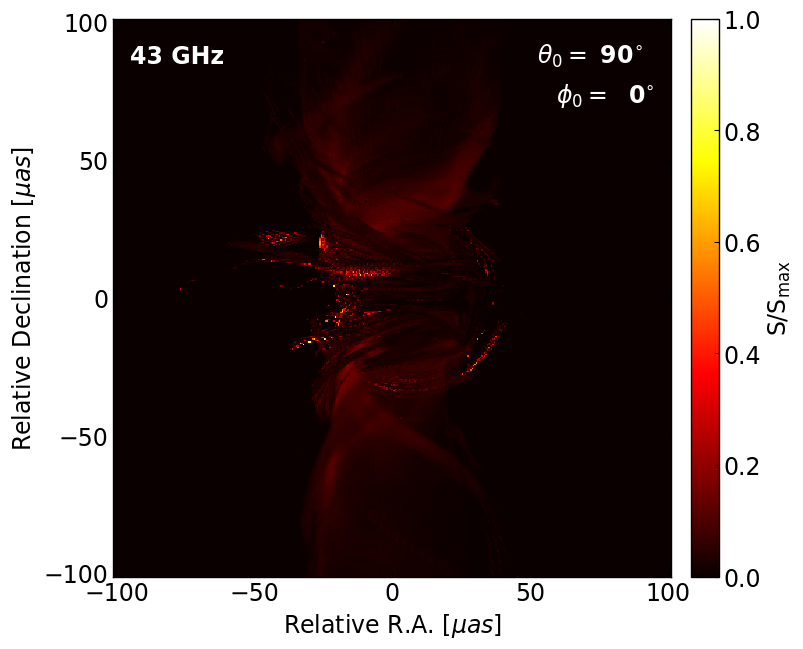

In [39]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [20]:
import os
import numpy as np

#find average flux
def bhoss_avg(Te_model,inclination,model_name, ifreq=2):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Te_model,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="%s_incl_%d_IMAGE_GRMHD_HAMR3D_%s_%d.dat" \
        %(Te_model,inclination,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+Te_model,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 10, "SANEA93M",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/f05_b1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
132, flux: 2.021006 at 9925.528924
133, flux: 2.021802 at 9934.173457
134, flux: 2.009289 at 9942.822006
135, flux: 1.943187 at 9955.791871
136, flux: 1.907529 at 9964.438576
137, flux: 1.867406 at 9973.082137
138, flux: 1.895609 at 9986.049828
139, flux: 1.913110 at 9994.698523
140, flux: 1.923312 at 10003.343218
141, flux: 1.989702 at 10016.310270
142, flux: 2.081746 at 10024.962133
143, flux: 2.048553 at 10033.615429
144, flux: 1.978555 at 10046.591838
145, flux: 1.961771 at 10055.242073
146, flux: 1.929160 at 10063.900253
147, flux: 1.942954 at 10076.889057
148, flux: 1.962966 at 10085.542268
149, flux: 2.004459 at 10094.188939
150, flux: 2.016275 at 10102.838018
151, flux: 2.037371 at 10115.820650
152, flux: 2.076768 at 10124.473785
153, flux: 2.131832 at 10133.126518
154, flux: 2.160531 at 10146.100336
155, flux: 2.154727 at 10154.74654

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.057616 Jy, the density scale = 4.000000e-14


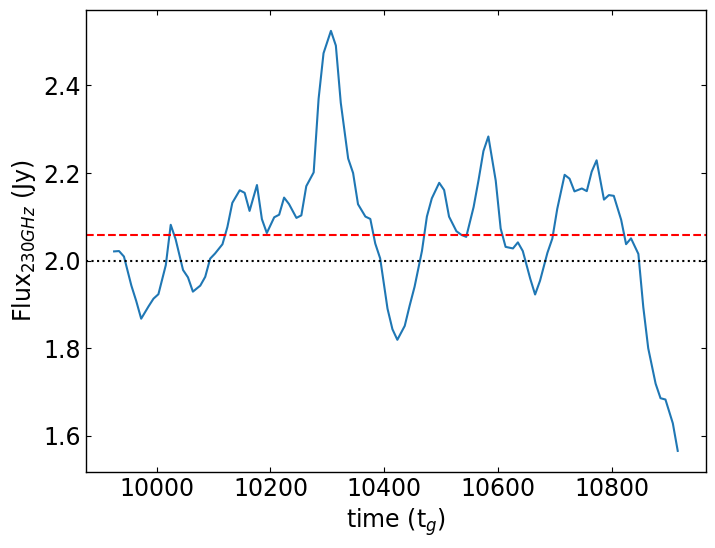

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

132:: 2.021006 Jy at 9925.528924
133:: 2.021802 Jy at 9934.173457
134:: 2.009289 Jy at 9942.822006
135:: 1.943187 Jy at 9955.791871
136:: 1.907529 Jy at 9964.438576
137:: 1.867406 Jy at 9973.082137
138:: 1.895609 Jy at 9986.049828
139:: 1.913110 Jy at 9994.698523
140:: 1.923312 Jy at 10003.343218
141:: 1.989702 Jy at 10016.310270
142:: 2.081746 Jy at 10024.962133
143:: 2.048553 Jy at 10033.615429
144:: 1.978555 Jy at 10046.591838
145:: 1.961771 Jy at 10055.242073
146:: 1.929160 Jy at 10063.900253
147:: 1.942954 Jy at 10076.889057
148:: 1.962966 Jy at 10085.542268
149:: 2.004459 Jy at 10094.188939
150:: 2.016275 Jy at 10102.838018
151:: 2.037371 Jy at 10115.820650
152:: 2.076768 Jy at 10124.473785
153:: 2.131832 Jy at 10133.126518
154:: 2.160531 Jy at 10146.100336
155:: 2.154727 Jy at 10154.746542
156:: 2.113431 Jy at 10163.398930
157:: 2.172520 Jy at 10176.385271
158:: 2.094691 Jy at 10185.047716
159:: 2.062998 Jy at 10193.708846
160:: 2.098924 Jy at 10206.700720
161:: 2.104743 Jy at 1

In [21]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 50, "SANEA93M",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/f05_b1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
132, flux: 1.909016 at 9925.528924
133, flux: 1.894691 at 9934.173457
134, flux: 1.899583 at 9942.822006
135, flux: 1.865735 at 9955.791871
136, flux: 1.849041 at 9964.438576
137, flux: 1.852950 at 9973.082137
138, flux: 1.919191 at 9986.049828
139, flux: 1.984879 at 9994.698523
140, flux: 1.998375 at 10003.343218
141, flux: 2.022756 at 10016.310270
142, flux: 2.045685 at 10024.962133
143, flux: 2.019845 at 10033.615429
144, flux: 1.976323 at 10046.591838
145, flux: 1.963024 at 10055.242073
146, flux: 1.960691 at 10063.900253
147, flux: 1.967114 at 10076.889057
148, flux: 2.001512 at 10085.542268
149, flux: 2.049418 at 10094.188939
150, flux: 2.104525 at 10102.838018
151, flux: 2.208899 at 10115.820650
152, flux: 2.290137 at 10124.473785
153, flux: 2.370664 at 10133.126518
154, flux: 2.416949 at 10146.100336
155, flux: 2.417245 at 10154.74654

In [22]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [23]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.053982 Jy, the density scale = 3.850000e-14


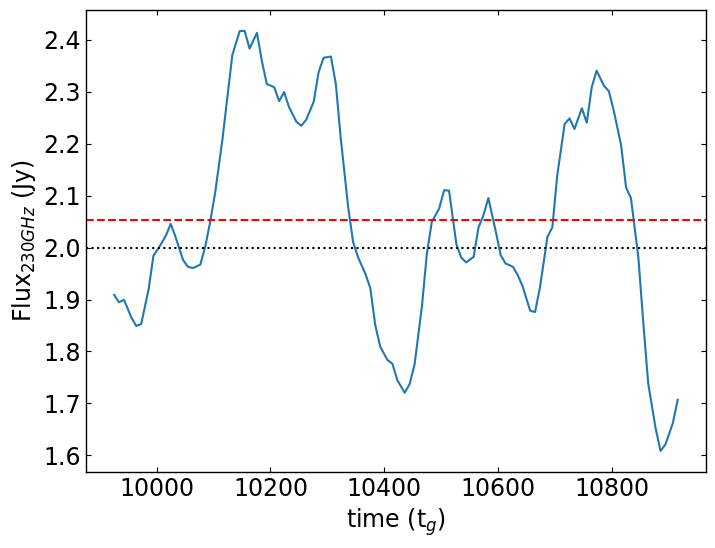

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [25]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

132:: 1.909016 Jy at 9925.528924
133:: 1.894691 Jy at 9934.173457
134:: 1.899583 Jy at 9942.822006
135:: 1.865735 Jy at 9955.791871
136:: 1.849041 Jy at 9964.438576
137:: 1.852950 Jy at 9973.082137
138:: 1.919191 Jy at 9986.049828
139:: 1.984879 Jy at 9994.698523
140:: 1.998375 Jy at 10003.343218
141:: 2.022756 Jy at 10016.310270
142:: 2.045685 Jy at 10024.962133
143:: 2.019845 Jy at 10033.615429
144:: 1.976323 Jy at 10046.591838
145:: 1.963024 Jy at 10055.242073
146:: 1.960691 Jy at 10063.900253
147:: 1.967114 Jy at 10076.889057
148:: 2.001512 Jy at 10085.542268
149:: 2.049418 Jy at 10094.188939
150:: 2.104525 Jy at 10102.838018
151:: 2.208899 Jy at 10115.820650
152:: 2.290137 Jy at 10124.473785
153:: 2.370664 Jy at 10133.126518
154:: 2.416949 Jy at 10146.100336
155:: 2.417245 Jy at 10154.746542
156:: 2.383050 Jy at 10163.398930
157:: 2.413527 Jy at 10176.385271
158:: 2.358956 Jy at 10185.047716
159:: 2.314900 Jy at 10193.708846
160:: 2.308813 Jy at 10206.700720
161:: 2.281973 Jy at 1

In [12]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 90, "SANEA93M",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/f05_b1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
132, flux: 2.104433 at 9925.528924
133, flux: 2.091250 at 9934.173457
134, flux: 2.055167 at 9942.822006
135, flux: 1.985993 at 9955.791871
136, flux: 1.977048 at 9964.438576
137, flux: 2.000797 at 9973.082137
138, flux: 2.078902 at 9986.049828
139, flux: 2.128825 at 9994.698523
140, flux: 2.185041 at 10003.343218
141, flux: 2.261241 at 10016.310270
142, flux: 2.252243 at 10024.962133
143, flux: 2.235544 at 10033.615429
144, flux: 2.262933 at 10046.591838
145, flux: 2.238487 at 10055.242073
146, flux: 2.188878 at 10063.900253
147, flux: 2.232783 at 10076.889057
148, flux: 2.300169 at 10085.542268
149, flux: 2.344522 at 10094.188939
150, flux: 2.381814 at 10102.838018
151, flux: 2.415706 at 10115.820650
152, flux: 2.423572 at 10124.473785
153, flux: 2.428026 at 10133.126518
154, flux: 2.476448 at 10146.100336
155, flux: 2.540328 at 10154.74654

In [13]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [14]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.151645 Jy, the density scale = 4.500000e-14


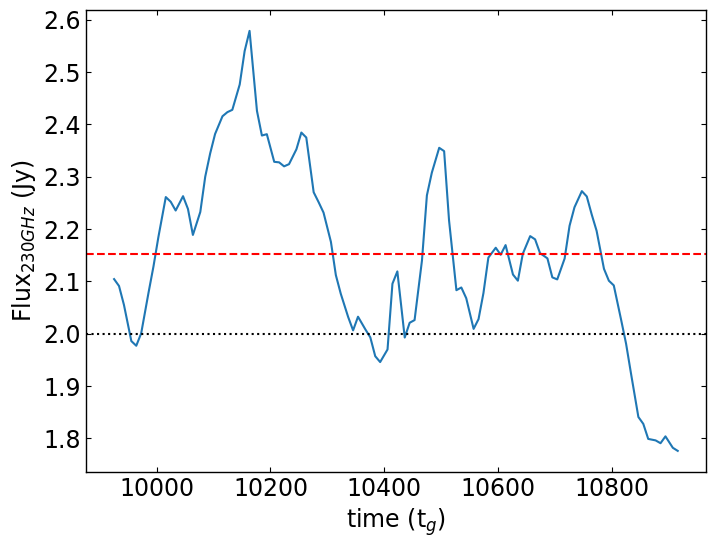

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [16]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

132:: 2.104433 Jy at 9925.528924
133:: 2.091250 Jy at 9934.173457
134:: 2.055167 Jy at 9942.822006
135:: 1.985993 Jy at 9955.791871
136:: 1.977048 Jy at 9964.438576
137:: 2.000797 Jy at 9973.082137
138:: 2.078902 Jy at 9986.049828
139:: 2.128825 Jy at 9994.698523
140:: 2.185041 Jy at 10003.343218
141:: 2.261241 Jy at 10016.310270
142:: 2.252243 Jy at 10024.962133
143:: 2.235544 Jy at 10033.615429
144:: 2.262933 Jy at 10046.591838
145:: 2.238487 Jy at 10055.242073
146:: 2.188878 Jy at 10063.900253
147:: 2.232783 Jy at 10076.889057
148:: 2.300169 Jy at 10085.542268
149:: 2.344522 Jy at 10094.188939
150:: 2.381814 Jy at 10102.838018
151:: 2.415706 Jy at 10115.820650
152:: 2.423572 Jy at 10124.473785
153:: 2.428026 Jy at 10133.126518
154:: 2.476448 Jy at 10146.100336
155:: 2.540328 Jy at 10154.746542
156:: 2.578906 Jy at 10163.398930
157:: 2.426020 Jy at 10176.385271
158:: 2.378864 Jy at 10185.047716
159:: 2.381450 Jy at 10193.708846
160:: 2.328640 Jy at 10206.700720
161:: 2.327589 Jy at 1